In [1]:
from beam_carbon.beam import BEAMCarbon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
beam = BEAMCarbon()
# choose temperature setup
beam.temperature_dependent = False
beam.linear_temperature = True

In [3]:
# BEAM with modification * self.time_step: 
# self.carbon_mass += ((self.transfer_matrix * self.time_step *
# np.divide(self.carbon_mass, self.intervals)).sum(axis=1) + emissions)

beam.time_step = 1.
beam.intervals = 3
beam.emissions = np.array([10.,10.,20.,20.])

results1 = beam.run()

results1

,0.0,1.0,2.0,3.0,4.0
mass_atmosphere,808.900000,816.900475,825.805151,844.296972,862.643757
mass_upper,725.000000,726.351536,726.764966,727.566237,728.469136
mass_lower,35641.000000,35641.647989,35642.329883,35643.036790,35643.787107
temp_atmosphere,0.730700,0.764700,0.798700,0.866700,0.934700
temp_ocean,0.006800,0.042995,0.079080,0.115061,0.152643
phi12,0.216356,0.222128,0.224947,0.228341,0.232979
phi22,-0.266956,-0.272128,-0.274947,-0.278341,-0.282979
cumulative,0.000000,20.000000,40.000000,80.000000,120.000000
A,0.000000,142.743611,142.743611,142.743611,142.743611
B,0.000000,0.007781,0.007879,0.007998,0.008161


In [4]:
results1_comp = results1.iloc[:,[0,2,4]]
results1_comp

,0.0,2.0,4.0
mass_atmosphere,808.900000,825.805151,862.643757
mass_upper,725.000000,726.764966,728.469136
mass_lower,35641.000000,35642.329883,35643.787107
temp_atmosphere,0.730700,0.798700,0.934700
temp_ocean,0.006800,0.079080,0.152643
phi12,0.216356,0.224947,0.232979
phi22,-0.266956,-0.274947,-0.282979
cumulative,0.000000,40.000000,120.000000
A,0.000000,142.743611,142.743611
B,0.000000,0.007879,0.008161


In [5]:
beam.time_step = 2.
beam.intervals = 6
beam.emissions = np.array([10.,20.])

results2 = beam.run()

results2

,0.0,2.0,4.0
mass_atmosphere,808.900000,826.562528,864.201607
mass_upper,725.000000,726.681366,728.319662
mass_lower,35641.000000,35641.656106,35642.378731
temp_atmosphere,0.730700,0.798700,0.934700
temp_ocean,0.006800,0.042995,0.080780
phi12,0.232979,0.224447,0.232149
phi22,-0.282979,-0.274447,-0.282149
cumulative,0.000000,40.000000,120.000000
A,0.000000,142.743611,142.743611
B,0.000000,0.007862,0.008132


In [6]:
results1_comp.equals(results2)

False

In [7]:
# Create Frame of comparison booleans
mismatch = (results1_comp != results2).stack()
res1_masked = results1_comp.stack()[mismatch]
res2_masked = results2.stack()[mismatch]
diff = res1_masked.subtract(res2_masked)

comp = pd.concat([res1_masked, res2_masked, diff], axis=1)
comp.columns=["results1", "results2", "difference"]
comp

results1      results2    difference
mass_atmosphere 2.0    825.805151    826.562528 -7.573779e-01
                4.0    862.643757    864.201607 -1.557850e+00
mass_upper      2.0    726.764966    726.681366  8.360050e-02
                4.0    728.469136    728.319662  1.494740e-01
mass_lower      2.0  35642.329883  35641.656106  6.737773e-01
                4.0  35643.787107  35642.378731  1.408376e+00
temp_atmosphere 4.0      0.934700      0.934700  1.110223e-16
temp_ocean      2.0      0.079080      0.042995  3.608525e-02
                4.0      0.152643      0.080780  7.186293e-02
phi12           0.0      0.216356      0.232979 -1.662324e-02
                2.0      0.224947      0.224447  4.997152e-04
                4.0      0.232979      0.232149  8.302936e-04
phi22           0.0     -0.266956     -0.282979  1.602324e-02
                2.0     -0.274947     -0.274447 -4.997152e-04
                4.0     -0.282979     -0.282149 -8.302936e-04
cumulative      4.0    120.000000    120.000000  1.421085e-14
B               2.0      0.007879      0.007862  1.750394e-05
                4.0      0.008161      0.008132  2.908339e-05

Text(0.5,1,'Beam original: temp_dep=False, lin_temp=True')

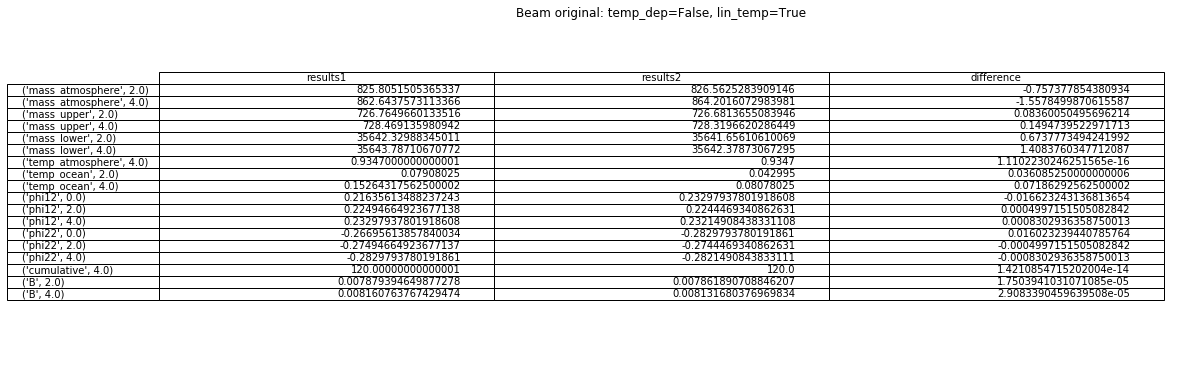

In [11]:
fig, ax = plt.subplots(figsize=(18,6))
ax.axis('off')

pd.plotting.table(ax, comp, loc='center')
ax.set_title("Beam original: temp_dep=False, lin_temp=True")

In [12]:
FILENAME = "beam_comp_orig_tdF_ltT_table"

In [15]:
#fig.savefig("figures/"+FILENAME+".pdf")

In [16]:
#comp.to_csv("figures/"+FILENAME+".csv")

In [18]:
# compare values Beam modified <> Beam original
FILE_PATH_orig = "../evaluation/figures/beam_comp_orig_tdT_ltF_table"
FILE_PATH_mod = "../evaluation/figures/beam_comp_mod_tdT_ltF_table"

In [19]:
# Read in the data from beam_comp_original and modified
data_orig = pd.read_csv(FILE_PATH_orig + ".csv", sep=',')
data_mod = pd.read_csv(FILE_PATH_mod + ".csv", sep=',')

In [25]:
eval = (data_orig != data_mod).stack()
data_orig_masked = data_orig.stack()[eval]
data_mod_masked = data_mod.stack()[eval]
subtr = data_orig_masked.subtract(data_mod_masked)

comp = pd.concat([data_orig_masked, data_mod_masked, subtr], axis=1)
comp.columns=["orig", "mod", "diff"]
comp.drop('difference', level=1)

,,orig,mod,diff
0,results2,826.563,825.805,0.757378
1,results2,864.266,862.711,1.55533
2,results2,726.681,726.765,-0.0836005
3,results2,728.257,728.407,-0.150094
4,results2,35641.7,35642.3,-0.673777
5,results2,35642.4,35643.8,-1.40524
6,results2,1.05651,1.05546,0.00104534
7,results2,1.33183,1.32905,0.00277368
9,results2,0.0936707,0.0936184,5.2267e-05
11,results2,0.224447,0.224947,-0.000499715
